## IT plače ##

Zakaj ne bi zbranih podatkov pokazali še nekoliko bolj drugače. Zdi se, da bi poleg klasičnega frekvenčnega pregleda lahko na hitro pregledali še relacije med spremenljivkami in ugotavljali, kaj se dogaja s plačami v IT industriji.

Notebook je narejen z uporabo distribucije Anaconda 3 in Python 3. Kakršnekoli pripombe in komentarji so dobrodošli.

In [1]:
# Najprej import knjižnic

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
import scipy
import warnings
from IPython.display import HTML
from textwrap import wrap

from sklearn import linear_model

%matplotlib inline
plt.rcParams['axes.facecolor']='white'
sns.set(context="notebook", font_scale=1.2)
warnings.filterwarnings('ignore')

C:\Users\gasper.stanovnik\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# Direkten import podatkov

IT_data = pd.read_csv('https://docs.google.com/spreadsheets/export?' + 
                      'id=1BebSshpZEm8plw0cge_pJMb18d52JW4kWC0e_sffAyk' +
                      '&exportFormat=csv', 
                      header=1, names=['Date', 'Employer', 'Origin', 'Arrangement', 'Pay', 'Duration'])

Ok, podatki so naloženi, najbolje da pogledamo vsako spremenljivko posebej.

Total N = 889


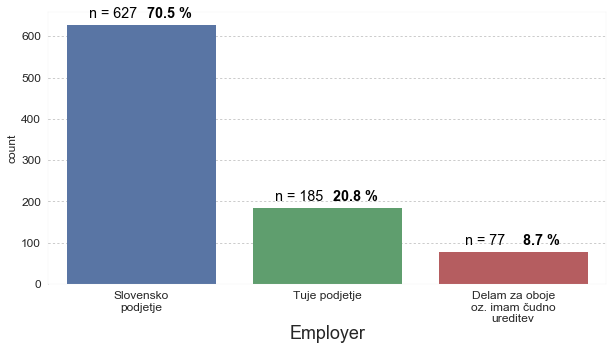

In [3]:
zaposlovalec=['Slovensko podjetje', 'Tuje podjetje', 'Delam za oboje oz. imam čudno ureditev']

sns.set_style("whitegrid", {'axes.edgecolor': '.8','axes.linewidth': 0.1,'ytick.major.size': 0.1,'ytick.minor.size': 0.1})

plt.figure(figsize=(10,5))

plt.grid(b=True, which='major', linestyle=':')
ncount = len(IT_data[IT_data['Employer'].isnull() == False])
ax = sns.countplot(x="Employer", data=IT_data, order=['Slovensko podjetje','Tuje podjetje','Delam za oboje oz. imam čudno ureditev'])
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f} %'.format(100.*y/ncount), (x.mean()+0.15, y+10), ha='center', va='bottom', color='black', weight='bold')
    ax.annotate('n = {:.0f}'.format(y), (x.mean()-0.15, y+10), ha='center', va='bottom', color='black')

zaposlovalec1 = [ '\n'.join(wrap(l, 15)) for l in zaposlovalec ]

ax.set_xticklabels(zaposlovalec1, fontsize=12)
ax.set_xlabel('Employer', fontsize=18)
ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_ylabel('count', fontsize=12)
    
print("Total N =", IT_data['Employer'].value_counts().sum())

Največ anketirancev dela za Slovensko podjetje (70.5 %), ena petina anketirancev pa dela za tuje podjetje (20.8 %). Najmanjši delež anketirancev pa pravi da dela za oboje oz. ima neko čudno ureditev (8.7 %). Poglejmo kakšno plačo imajo anketiranci glede na to za katero podjetje delajo.

In [5]:
'''
Zaradi prikaza v boxplotu moramo transformirati kategorije v numerična števila, v gafu sicer kategorije potem nadomestim z 
labelami, da vemo za kateri plačni razred gre.
'''

IT_data['Pay_F'] = IT_data['Pay'].apply(lambda x: {'< 700 EUR' : 0, '700 - 900 EUR' : 1, '900 - 1100 EUR' : 2, 
                                                   '1100 - 1300 EUR' : 3, '1300 - 1600 EUR' : 4, '1600 - 2000 EUR' : 5, 
                                                   '2000 - 2500 EUR' : 6, '2500 - 3000 EUR' : 7, '3000 - 3500 EUR' : 8, 
                                                   '3500 - 4500 EUR' : 9, '4500 - 5500 EUR' : 10, '5500 - 7000 EUR' : 11,
                                                   '7000 - 9000 EUR' : 12, '9000 - 12000 EUR' : 13, '> 12000 EUR' : 14}[x])

znesek=['< 700 €', '700 - 900 €', '900 - 1100 €', '1100 - 1300 €', '1300 - 1600 €', '1600 - 2000 €', '2000 - 2500 €', 
        '2500 - 3000 €', '3000 - 3500 €', '3500 - 4500 €', '4500 - 5500 €', '5500 - 7000 €', '7000 - 9000 €', 
        '9000 - 12000 €', '> 12000 €']

Total N = 889


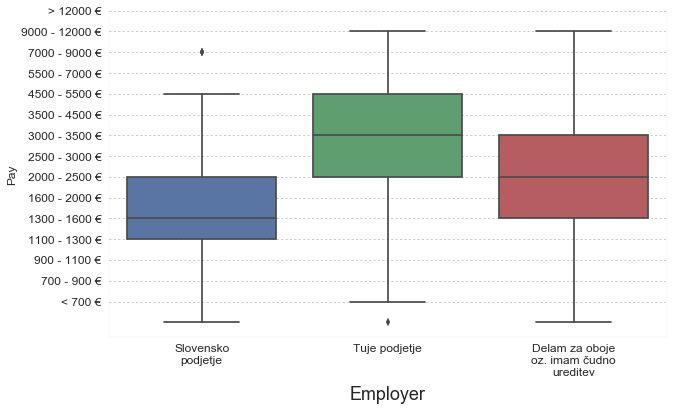

In [6]:
sns.set_style("whitegrid", {'axes.edgecolor': '.8','axes.linewidth': 0.1,'ytick.major.size': 0.1,'ytick.minor.size': 0.1})

plt.figure(figsize=(10,6))

plt.grid(b=True, which='major', linestyle=':')

ax = sns.boxplot(x="Employer", y="Pay_F", data=IT_data, order=zaposlovalec)

ax.set_yticks(np.arange(1,16))
ax.set_yticklabels(znesek)

zaposlovalec1 = [ '\n'.join(wrap(l, 15)) for l in zaposlovalec ]

ax.set_xticklabels(zaposlovalec1, fontsize=12)
ax.set_xlabel('Employer', fontsize=18)
ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_ylabel('Pay', fontsize=12)
    
print("Total N =", IT_data['Employer'].value_counts().sum())

Glede na to, da so vse spremenljivke kategorične, je smiselen prikaz boxplot-a (boxplot je razdeljen na 4 kvartile, torej 'škatla' predstavlja 50 % vseh anketirancev; 50 % preostalih pa so porazdeljeni v zgornji oz. spodnji kvartil).

Anketiranci, ki delajo za slovenska podjetja imajo nekoliko nižje plače kot anketiranci, ki delajo za tuja podjetja (torej range 3. kvartila anketirancev, ki dela za slovenska podjetja je med 1.300 € - 2.500 €, medtem ko je range prav tako 3. kvartila anketirancev, ki delajo za tuje podjetje med 3.000 € - 5.500 €). 

Mediana se zdi dober pokazatelj srednje vrednosti in prav tako lepo pokaže razliko med vsemi tremi različnimi tipi delodajalcev.

In [8]:
# Recode podatkov - Origin

IT_data.loc[IT_data['Origin'] == 'Živim v Sloveniji', 'Origin_r'] = 'Živim v Sloveniji'
IT_data.loc[IT_data['Origin'] == 'Živim v drugi državi EU', 'Origin_r'] = 'Živim v drugi državi / nomad'
IT_data.loc[IT_data['Origin'] == 'Živim v drugi državi', 'Origin_r'] = 'Živim v drugi državi / nomad'
IT_data.loc[IT_data['Origin'] == 'Živim v ZDA', 'Origin_r'] = 'Živim v drugi državi / nomad'
IT_data.loc[IT_data['Origin'] == 'Stalno prebivališče se pogosto spreminja, v skladu s potrebami in zmožnostmi - davčni rezident sem v Sloveniji.', 'Origin_r'] = 'Živim v drugi državi / nomad'
IT_data.loc[IT_data['Origin'] == 'Nomad', 'Origin_r'] = 'Živim v drugi državi / nomad'

legenda = ['Živim v Sloveniji','Živim v drugi državi / nomad']

Total N = 889


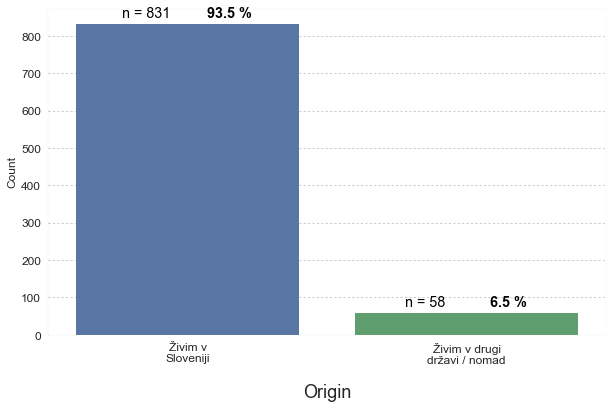

In [9]:
plt.figure(figsize=(10,6))

sns.set_style("whitegrid", {'axes.edgecolor': '.8','axes.linewidth': 0.1,'ytick.major.size': 0.1,'ytick.minor.size': 0.1})

plt.grid(b=True, which='major', linestyle=':')
ncount = len(IT_data[IT_data['Origin_r'].isnull() == False])
ax = sns.countplot(x="Origin_r", data=IT_data, order=legenda)

legenda = ['\n'.join(wrap(l, 15)) for l in legenda]

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f} %'.format(100.*y/ncount), (x.mean()+0.15, y+10), ha='center', va='bottom', color='black', weight='bold')
    ax.annotate('n = {:.0f}'.format(y), (x.mean()-0.15, y+10), ha='center', va='bottom', color='black')

ax.set_xticklabels(legenda, fontsize=12)
ax.set_xlabel('Origin', fontsize=18)
ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_ylabel('Count', fontsize=12)
    
print("Total N =", IT_data['Origin_r'].value_counts().sum())

Total N = 889


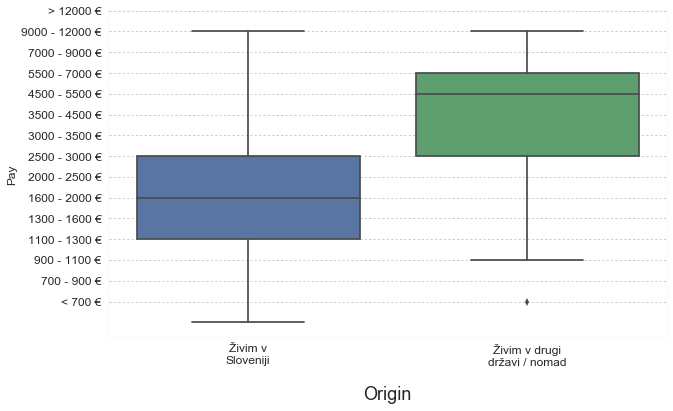

In [10]:
sns.set_style("whitegrid", {'axes.edgecolor': '.8','axes.linewidth': 0.1,'ytick.major.size': 0.1,'ytick.minor.size': 0.1})

plt.figure(figsize=(10,6))

plt.grid(b=True, which='major', linestyle=':')

ax = sns.boxplot(x="Origin_r", y="Pay_F", data=IT_data)

ax.set_yticks(np.arange(1,16))
ax.set_yticklabels(znesek)

legenda1 = [ '\n'.join(wrap(l, 15)) for l in legenda ]

ax.set_xticklabels(legenda, fontsize=12)
ax.set_xlabel('Origin', fontsize=18)
ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_ylabel('Pay', fontsize=12)
    
print("Total N =", IT_data['Origin_r'].value_counts().sum())

In [18]:
# Recode podatkov v 4 kategorije

IT_data.loc[IT_data['Arrangement'] == 'Zaposlen', 'Arrangement_r'] = 'Zaposlen'
IT_data.loc[IT_data['Arrangement'] == 'Podjetje / s.p.', 'Arrangement_r'] = 'Podjetje / s.p.'
IT_data.loc[IT_data['Arrangement'] == 'Študent', 'Arrangement_r'] = 'Študent'
IT_data.loc[IT_data['Arrangement'] == 'Zaposlen in S.P', 'Arrangement_r'] = 'Podjetje / s.p.'
IT_data.loc[IT_data['Arrangement'] == 'Avtorske in podjemne pogodbe', 'Arrangement_r'] = 'Drugo'
IT_data.loc[IT_data['Arrangement'] == 'zaposlen in popoldanski s.p.', 'Arrangement_r'] = 'Podjetje / s.p.'
IT_data.loc[IT_data['Arrangement'] == 'zaposlen + s.p.', 'Arrangement_r'] = 'Podjetje / s.p.'
IT_data.loc[IT_data['Arrangement'] == 'Več podjetij in s.p.', 'Arrangement_r'] = 'Podjetje / s.p.'

dogovor = ['Zaposlen', 'Podjetje / s.p.']

Total N = 879


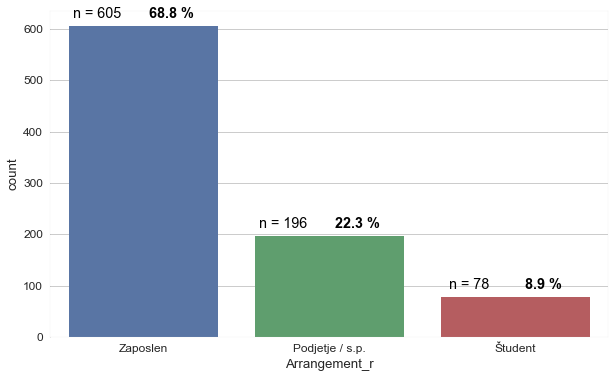

In [20]:
plt.figure(figsize=(10,6))

sns.set_style("whitegrid", {'axes.edgecolor': '.8','axes.linewidth': 0.1,'ytick.major.size': 0.1,'ytick.minor.size': 0.1})

ncount = len(IT_data[IT_data['Arrangement_r'].isnull() == False])
ax = sns.countplot(x="Arrangement_r", data=IT_data, order=['Zaposlen','Podjetje / s.p.','Študent'])
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f} %'.format(100.*y/ncount), (x.mean()+0.15, y+10), ha='center', va='bottom', color='black', weight='bold')
    ax.annotate('n = {:.0f}'.format(y), (x.mean()-0.25, y+10), ha='center', va='bottom', color='black')
    
print("Total N =", IT_data['Arrangement_r'].value_counts().sum())

Total N = 879


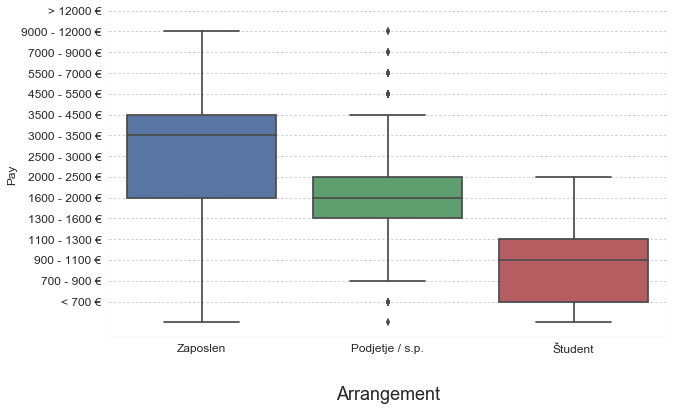

In [21]:
sns.set_style("whitegrid", {'axes.edgecolor': '.8','axes.linewidth': 0.1,'ytick.major.size': 0.1,'ytick.minor.size': 0.1})

leg=['Zaposlen','Podjetje / s.p.','Študent']

plt.figure(figsize=(10,6))

plt.grid(b=True, which='major', linestyle=':')

ax = sns.boxplot(x="Arrangement_r", y="Pay_F", data=IT_data)

ax.set_yticks(np.arange(1,16))
ax.set_yticklabels(znesek)

leg1 = [ '\n'.join(wrap(l, 15)) for l in leg ]

ax.set_xticklabels(leg, fontsize=12)
ax.set_xlabel('Arrangement', fontsize=18)
ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_ylabel('Pay', fontsize=12)
    
print("Total N =", IT_data['Arrangement_r'].value_counts().sum())

In [35]:
IT_data['Duration_F'] = IT_data['Duration'].apply(lambda x: {'Sem svež in komaj začenjam' : 0, '1 leto' : 1, '1 - 3 leta' : 2, '3 - 6 let' : 3, 
                                                             '6 - 10 let' : 4, '10 - 15 let' : 5, '15 - 25 let' : 6, '25 - 35 let' : 7,
                                                             'Več kot 35 let' : 8}[x])

trajanje = ('Sem svež in komaj začenjam', '1 leto', '1 - 3 leta', '3 - 6 let', '6 - 10 let', '10 - 15 let', '15 - 25 let', 
            '25 - 35 let', 'Več kot 35 let')

Total N = 879


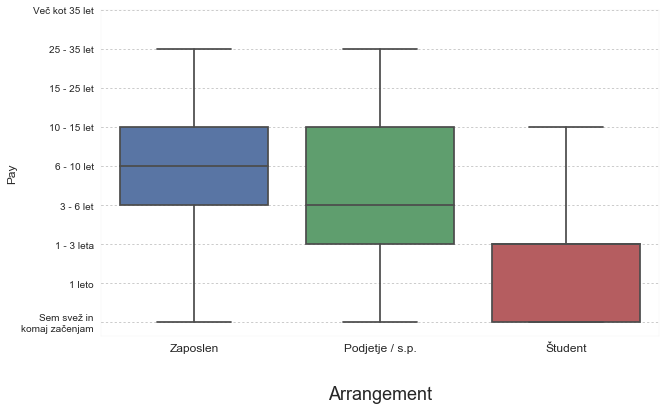

In [40]:
sns.set_style("whitegrid", {'axes.edgecolor': '.8','axes.linewidth': 0.1,'ytick.major.size': 0.1,'ytick.minor.size': 0.1})

leg=['Zaposlen','Podjetje / s.p.','Študent','Drugo']

plt.figure(figsize=(10,6))

plt.grid(b=True, which='major', linestyle=':')

ax = sns.boxplot(x="Arrangement_r", y="Duration_F", data=IT_data)

trajanje1 = [ '\n'.join(wrap(l, 15)) for l in trajanje ]

ax.set_yticks(np.arange(0,9))
ax.set_yticklabels(trajanje1)

leg1 = [ '\n'.join(wrap(l, 15)) for l in leg ]

ax.set_xticklabels(leg, fontsize=12)
ax.set_xlabel('Arrangement', fontsize=18)
ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_ylabel('Pay', fontsize=12)
    
print("Total N =", IT_data['Arrangement_r'].value_counts().sum())

Total N = 889


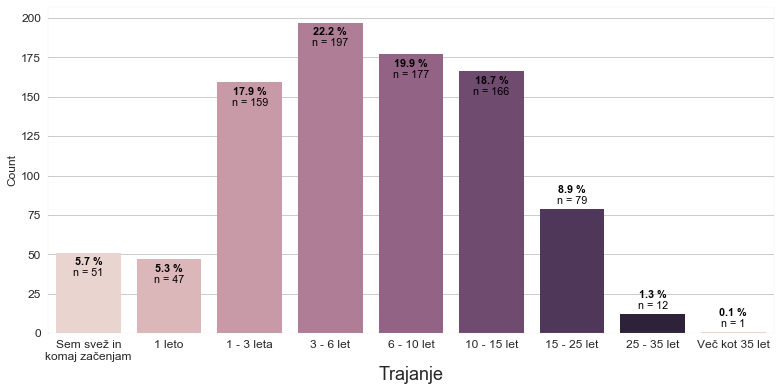

In [26]:
plt.figure(figsize=(13,6))

sns.set_style("whitegrid", {'axes.edgecolor': '.8','axes.linewidth': 0.1,'ytick.major.size': 0.1,'ytick.minor.size': 0.1})

trajanje = ['Sem svež in komaj začenjam', '1 leto', '1 - 3 leta', '3 - 6 let', '6 - 10 let', '10 - 15 let',
          '15 - 25 let', '25 - 35 let', 'Več kot 35 let']

ncount = len(IT_data[IT_data['Duration'].isnull() == False])

ax = sns.countplot(x="Duration", data=IT_data, order=trajanje, palette=sns.cubehelix_palette(8))

sns.set(font_scale=0.9)

for p in ax.patches[0:6]:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]

    ax.annotate('{:.1f} %'.format(100.*y/ncount), (x.mean(), y-9), ha='center', va='bottom', color='black', weight='bold')
    ax.annotate('n = {:.0f}'.format(y), (x.mean(), y-16), ha='center', va='bottom', color='black')

for p in ax.patches[6:]:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]

    ax.annotate('{:.1f} %'.format(100.*y/ncount), (x.mean(), y+9), ha='center', va='bottom', color='black', weight='bold')
    ax.annotate('n = {:.0f}'.format(y), (x.mean(), y+2), ha='center', va='bottom', color='black')

trajanje1 = [ '\n'.join(wrap(l, 15)) for l in trajanje ]
       
ax.set_xticklabels(trajanje1, fontsize=12)
ax.set_xlabel('Trajanje', fontsize=18)
ax.set_ylabel('Count', fontsize=12)
    
print("Total N =", IT_data['Duration'].value_counts().sum())

In [32]:
del IT_data['Employer_f']

KeyError: 'Employer_f'

In [34]:
IT_data.head()

,Date,Employer,Origin,Arrangement,Pay,Duration,Pay_F,Origin_r,Arrangement_r,Duration_F,Employer_F,Origin_r_F,Arrangement_r_F
0,4/20/2017 11:05:33,Tuje podjetje,Živim v Sloveniji,Podjetje / s.p.,5500 - 7000 EUR,6 - 10 let,NaN,Živim v Sloveniji,Podjetje / s.p.,5.0,0,0,NaN
1,4/20/2017 11:08:59,Slovensko podjetje,Živim v Sloveniji,Zaposlen,1300 - 1600 EUR,10 - 15 let,NaN,Živim v Sloveniji,Zaposlen,6.0,1,0,1.0
2,4/20/2017 11:12:35,Slovensko podjetje,Živim v Sloveniji,Zaposlen,1600 - 2000 EUR,1 leto,NaN,Živim v Sloveniji,Zaposlen,2.0,1,0,1.0
3,4/20/2017 11:12:53,Tuje podjetje,Živim v drugi državi EU,Zaposlen,3500 - 4500 EUR,10 - 15 let,NaN,Živim v drugi državi / nomad,Zaposlen,6.0,0,1,1.0
4,4/20/2017 11:13:07,Slovensko podjetje,Živim v Sloveniji,Zaposlen,2500 - 3000 EUR,1 - 3 leta,NaN,Živim v Sloveniji,Zaposlen,3.0,1,0,1.0


In [27]:
# Factorisation of all object type of variables

objvars = ["Employer","Origin_r","Arrangement_r","Pay","Duration"]

for i in objvars:
    a = i+"_F"
    IT_data[a] = pd.factorize(IT_data[i])[0]

sorterIndex_Pay = dict(zip(znesek,range(1,len(znesek))))
sorterIndex_Duration = dict(zip(trajanje,range(1,len(trajanje))))
sorterIndex_Arrangement = dict(zip(dogovor,range(1,len(dogovor))))

IT_data['Pay_F'] = IT_data['Pay'].map(sorterIndex_Pay)
IT_data['Duration_F'] = IT_data['Duration'].map(sorterIndex_Duration)
IT_data['Arrangement_r_F'] = IT_data['Arrangement_r'].map(sorterIndex_Arrangement)

IT_data.dtypes

Date                object
Employer            object
Origin              object
Arrangement         object
Pay                 object
Duration            object
Pay_F              float64
Origin_r            object
Arrangement_r       object
Duration_F         float64
Employer_F           int64
Origin_r_F           int64
Arrangement_r_F    float64
dtype: object

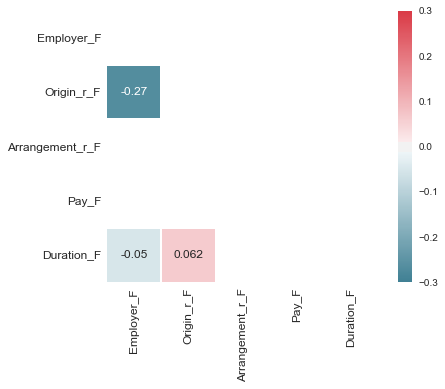

In [28]:
# Now compute the correlation matrix for factorised vars
IT_datac = IT_data[['Employer_F','Origin_r_F','Arrangement_r_F','Pay_F','Duration_F']]

corr = IT_datac.corr()

sns.set(style="white")
sns.set_context("paper", font_scale=1.5)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set(font_scale=1)
xx = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, square=True, linewidths=.5, annot=True)

In [25]:
dogovor

['Zaposlen', 'Podjetje / s.p.', 'Drugo']

In [6]:
x = IT_data['Duration_F'].values.reshape(-1, 1)
y = IT_data['Pay_F'].values.reshape(-1, 1)
z = IT_data[['Duration_F', 'Pay_F']]

KeyError: 'Duration_F'

In [27]:
# Create linear regression object
regressor = linear_model.LinearRegression()

# Train the model using the training sets
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
# The coefficients
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [[ 0.07727895]]


C:\Users\gasper.stanovnik\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


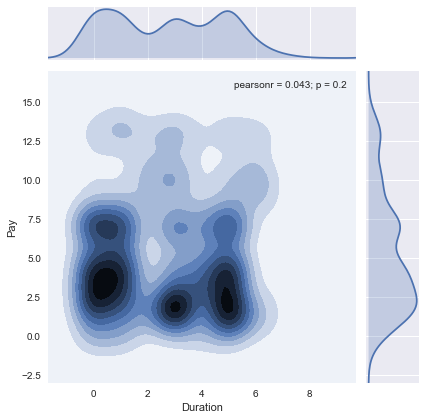

In [29]:
x = sns.jointplot(x=IT_data["Duration_F"], y=IT_data["Pay_F"], kind='kde')
x.set_axis_labels('Duration', 'Pay')

C:\Users\gasper.stanovnik\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:127: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\gasper.stanovnik\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:127: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\gasper.stanovnik\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Users\gasper.stanovnik\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\ma\core.py:4185: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
C:\Users\gasper.stanovnik\AppData\Local\C

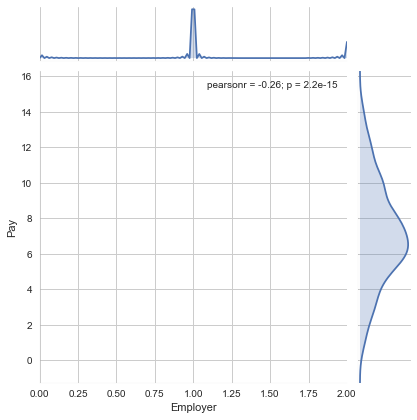

In [86]:
x = sns.jointplot(x=IT_data["Employer_F"], y=IT_data["Pay_F"], kind='kde')
x.set_axis_labels('Employer', 'Pay')

In [85]:
IT_data['Arrangment_r_F'].value_counts()

KeyError: 'Arrangment_r_F'

In [73]:
pd.crosstab(IT_data['Pay'], IT_data['Pay_F'])

Pay_F,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
Pay,,,,,,,,,,,,,,
1100 - 1300 EUR,0,0,0,51,0,0,0,0,0,0,0,0,0,0
1300 - 1600 EUR,0,0,0,0,87,0,0,0,0,0,0,0,0,0
1600 - 2000 EUR,0,0,0,0,0,151,0,0,0,0,0,0,0,0
2000 - 2500 EUR,0,0,0,0,0,0,135,0,0,0,0,0,0,0
2500 - 3000 EUR,0,0,0,0,0,0,0,118,0,0,0,0,0,0
3000 - 3500 EUR,0,0,0,0,0,0,0,0,64,0,0,0,0,0
3500 - 4500 EUR,0,0,0,0,0,0,0,0,0,79,0,0,0,0
4500 - 5500 EUR,0,0,0,0,0,0,0,0,0,0,37,0,0,0
5500 - 7000 EUR,0,0,0,0,0,0,0,0,0,0,0,38,0,0


In [74]:
f = IT_data.loc[IT_data['Employer'] == 'Slovensko podjetje']

In [75]:
pd.crosstab(f['Pay'], f['Pay_F'])

Pay_F,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,14.0
Pay,,,,,,,,,,,,,
1100 - 1300 EUR,0,0,0,43,0,0,0,0,0,0,0,0,0
1300 - 1600 EUR,0,0,0,0,74,0,0,0,0,0,0,0,0
1600 - 2000 EUR,0,0,0,0,0,133,0,0,0,0,0,0,0
2000 - 2500 EUR,0,0,0,0,0,0,117,0,0,0,0,0,0
2500 - 3000 EUR,0,0,0,0,0,0,0,83,0,0,0,0,0
3000 - 3500 EUR,0,0,0,0,0,0,0,0,48,0,0,0,0
3500 - 4500 EUR,0,0,0,0,0,0,0,0,0,32,0,0,0
4500 - 5500 EUR,0,0,0,0,0,0,0,0,0,0,14,0,0
5500 - 7000 EUR,0,0,0,0,0,0,0,0,0,0,0,5,0
